<a href="https://colab.research.google.com/github/shibajiray/programming-foundations-data-structures-4410875/blob/main/shibajisproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files


uploaded = files.upload()


Saving Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv to Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv


In [3]:
# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')


In [4]:
# Data Cleaning and Exploration
# Handle missing values
df_cleaned = df.dropna(subset=['ENERGY STAR Score'])

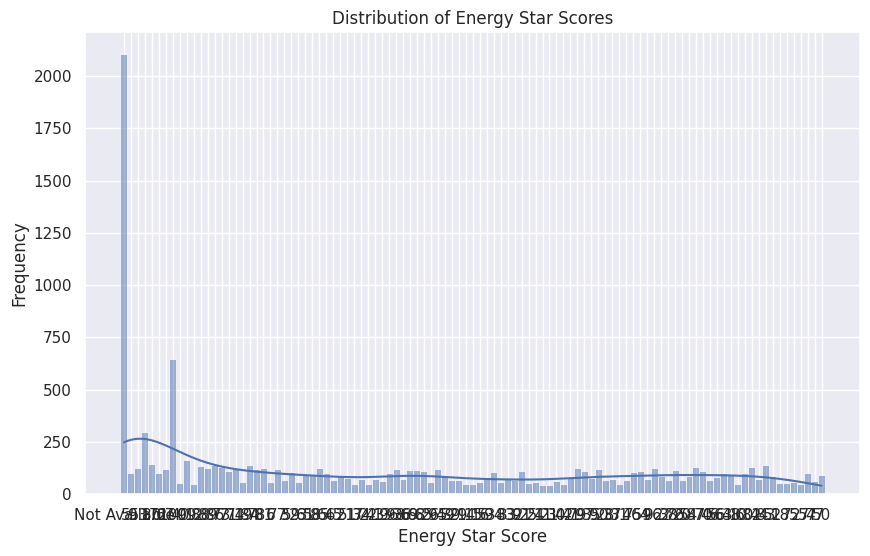

In [5]:
# Explore the distribution of Energy Star scores
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ENERGY STAR Score'], bins=30, kde=True)
plt.title('Distribution of Energy Star Scores')
plt.xlabel('Energy Star Score')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Exclude non-numeric columns from the correlation matrix
df['ENERGY STAR Score'] = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce').astype(float)

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Extract correlations with the 'ENERGY STAR Score' column
energy_star_correlations = correlation_matrix['ENERGY STAR Score']

# Display correlations sorted by magnitude
sorted_correlations = energy_star_correlations.abs().sort_values(ascending=False)
print(sorted_correlations)

ENERGY STAR Score                      1.000000
Year Built                             0.118181
Community Board                        0.064054
Council District                       0.063185
Property Id                            0.047020
Latitude                               0.044262
Order                                  0.039524
Occupancy                              0.031116
Longitude                              0.029670
Number of Buildings - Self-reported    0.020564
Property GFA - Self-Reported (ft²)     0.016800
DOF Gross Floor Area                   0.006877
Census Tract                           0.001607
Name: ENERGY STAR Score, dtype: float64


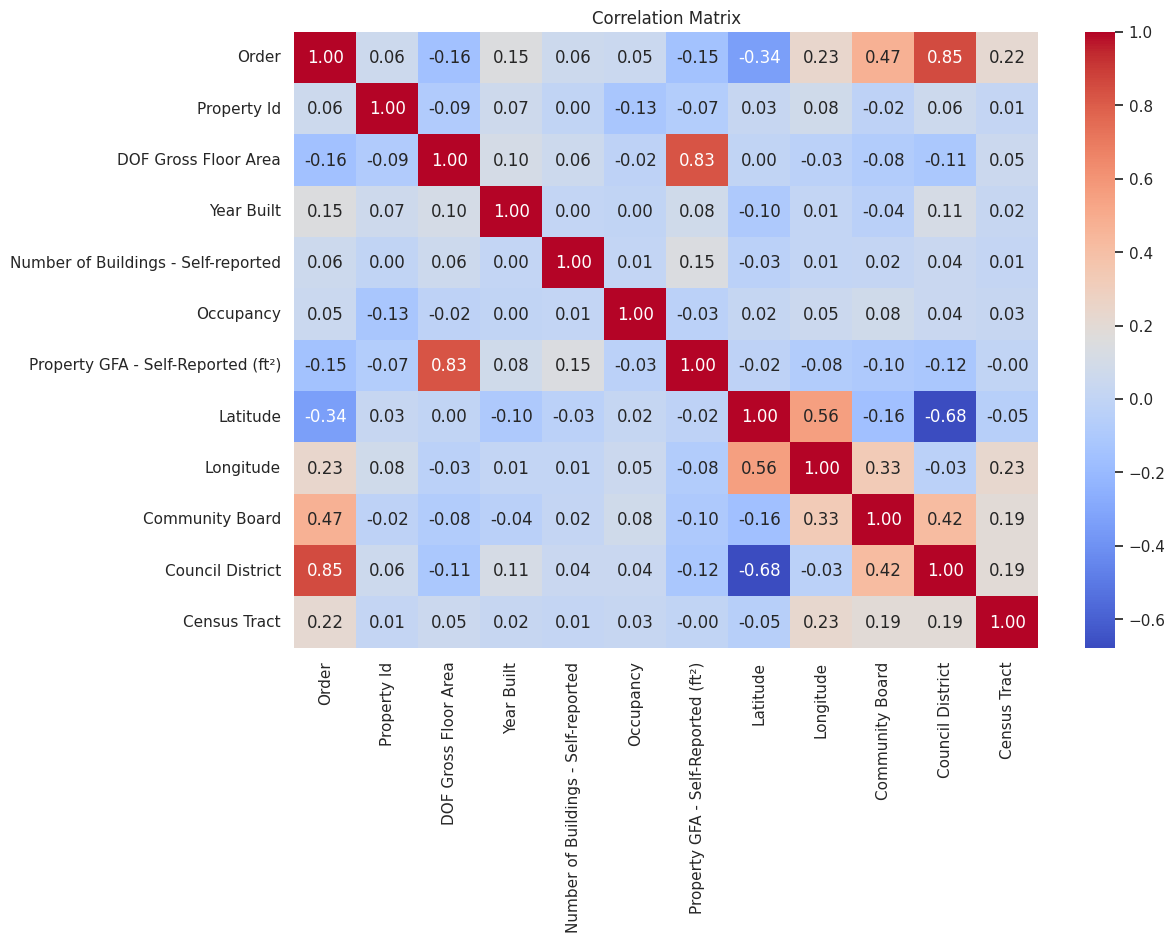

In [7]:
# Filter numeric columns for correlation matrix
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Explore relationships between numeric independent variables and Energy Star score
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numeric_columns].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Assume 'ENERGY STAR Score' column has NaN values
column_name = 'ENERGY STAR Score'

# Convert the column to numeric, handling errors by setting them to NaN
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Calculate the mean of the column (excluding NaN values)
mean_value = df[column_name].mean()

# Replace NaN values with the mean
df[column_name].fillna(mean_value, inplace=True)

# Now, df contains NaN values in the specified column replaced with the mean


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Select relevant columns (numeric columns)
X = df.select_dtypes(include=['float64', 'int64'])

# Impute NaN values using mean or any other strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Perform PCA on the imputed data
pca = PCA()
X_pca = pca.fit_transform(X_imputed)


In [10]:
df.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Select relevant columns (numeric columns)
X = df.select_dtypes(include=['float64', 'int64'])
y = df['ENERGY STAR Score']  # Replace 'Target_Column' with your target variable

# Drop rows with NaN values in features
X_cleaned = X.dropna()

# Extract the target variable corresponding to the cleaned data
y_cleaned = y[X_cleaned.index]


# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have standardized your features (X_train and X_test) using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Impute missing values in the test set
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Create and train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled_imputed)

# Now, you can calculate precision and F1 score as before

# Calculate precision and F1 score with zero_division parameter
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Print or use precision and F1 as needed
print("Weighted Precision:", precision)
print("Weighted F1 Score:", f1)

# Display the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')





Weighted Precision: 0.7514944885926685
Weighted F1 Score: 0.060657640232108324
Confusion Matrix:
[[  0   0   2 ...   0   0  76]
 [  0   0   0 ...   0   0  13]
 [  0   0   0 ...   0   0 132]
 ...
 [  0   0   0 ...   0   0  20]
 [  0   0   0 ...   0   0  35]
 [  0   0   5 ...   0   0 441]]
Accuracy: 0.1876595744680851


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

# Load the dataset
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Assuming 'ENERGY STAR Score' is your target variable
target_variable = 'ENERGY STAR Score'

# Assuming the columns you want to use as features
features = ['DOF Gross Floor Area', 'Year Built', 'Number of Buildings - Self-reported', 'Site EUI (kBtu/ft²)']

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
X = df[features].copy()
y = df[target_variable]

# Replace 'Not Available' with NaN
X.replace('Not Available', pd.NA, inplace=True)

# Convert the features to numeric (assuming you have other non-numeric values)
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Rest of the code remains unchanged
# Define a range of k values to search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN classifier
knn_model = KNeighborsClassifier()

# Use GridSearchCV to find the optimal k value
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameter
best_k_value = grid_search.best_params_['n_neighbors']

# Create and train the KNN classifier with the best k value
best_knn_model = KNeighborsClassifier(n_neighbors=best_k_value)
best_knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Best K Value: {best_k_value}')
print(f'Accuracy Score: {accuracy}')


# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Best K Value: 11
Accuracy Score: 0.11063829787234042
Precision: 0.1106
Recall: 0.1106


In [ ]:
# K-Means Clustering

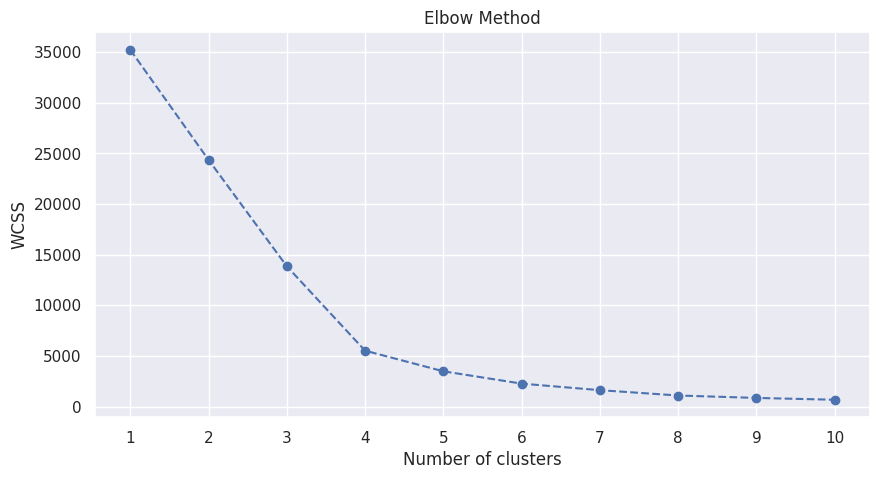

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Error Resolved

# Assuming 'df' is your DataFrame and features contains the column names
features = ['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Total GHG Emissions (Metric Tons CO2e)']
X = df[features]

# Convert 'Not Available' to NaN so it can be handled by fillna
X = X.replace('Not Available', np.nan)

# Convert all columns to numeric, coercing errors will turn unconvertible values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the median of each column, specifying numeric_only=True to address the warning
X = X.fillna(X.median(numeric_only=True))

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_scaled is now ready for clustering

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Checking for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()
